In [38]:
# ! pip install plotly

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import cv2
from skimage.io import imread
from skimage.transform import resize    
import pandas as pd   
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
import seaborn as sns

### Function to convert image to flatten array

In [40]:
DATADIR = 'E:/yaman/python/gender/expression/images/train/'
CATEGORIES = ['happy','sad']

In [41]:
# label = [] 
# train_data=[]
# for category in CATEGORIES:
#       class_num=CATEGORIES.index(category)
#       path=os.path.join(DATADIR,category)
#       for img in os.listdir(path):
#         img_array=imread(os.path.join(path,img))
#         img_resized=resize(img_array,(25,25,2))
#         img_black = np.mean(img_resized, axis=2)
#         plt.imshow(img_black,cmap='gray')
#         plt.show()
#         train_data.append(img_black.flatten())
#         label.append(class_num)
#         break
#     break
# len(train_data[0])


### Converting image to training dataframe

In [42]:
# label = []
# train_data = []

# def create_training_data():
#     for category in CATEGORIES:
#       class_num=CATEGORIES.index(category)
#       path=os.path.join(DATADIR,category)
#       for img in os.listdir(path):
#         img_array=imread(os.path.join(path,img))
#         img_resized=resize(img_array,(30,30,3))
#         img_black = np.mean(img_resized, axis=2)
#         train_data.append(img_black.flatten())
#         label.append(class_num)
# create_training_data()
# train_data=np.array(train_data)
# label=np.array(label)

In [43]:
# y_train = pd.DataFrame(label)
# x_train= pd.DataFrame(train_data)

In [44]:
# DATADIR = 'E:/yaman/python/gender/expression/images/validation/'
# CATEGORIES = ['happy','sad']

### Converting image to testing dataframe

In [45]:
# label = []
# test_data = []

# def create_training_data():
#     for category in CATEGORIES:
#       class_num=CATEGORIES.index(category)
#       path=os.path.join(DATADIR,category)
#       for img in os.listdir(path):
#         img_array=imread(os.path.join(path,img))
#         img_resized=resize(img_array,(30,30,3))
#         img_black = np.mean(img_resized, axis=2)
#         test_data.append(img_black.flatten())
#         label.append(class_num)
# create_training_data()
# test_data=np.array(test_data)
# label=np.array(label)

In [46]:
# y_test = pd.DataFrame(label)
# x_test= pd.DataFrame(test_data)

## Conterving to csv file

In [47]:
# train30 = x_train
# train30['label'] = y_train
# test30=x_test
# test30['label'] = y_test

# train30.to_csv('train25.csv')
# test30.to_csv('test25.csv')


# Importing dataset image size 25 px

In [48]:
# Dataset with 25 25 img size
dataset25 = pd.read_csv('train25.csv')
print(pd.DataFrame(dataset25).head())


from sklearn.utils import shuffle
dataset25 = shuffle(dataset25)
x_train = dataset25.iloc[:,1:-1]
y_train = dataset25['label']

dataset25 = pd.read_csv('test25.csv')

## suffle the dataset 
from sklearn.utils import shuffle
dataset25 = shuffle(dataset25)
x_test = dataset25.iloc[:,1:-1]
y_test = dataset25['label']
x_test.head()
y_test.shape



   Unnamed: 0         0         1         2         3         4         5  \
0           0  0.619980  0.628044  0.637224  0.620775  0.581865  0.545206   
1           1  0.756718  0.774187  0.651631  0.294515  0.606577  0.959757   
2           2  0.235358  0.161917  0.168816  0.141098  0.156207  0.206551   
3           3  0.992157  0.992157  0.988863  0.862623  0.340450  0.158521   
4           4  0.015686  0.021098  0.018431  0.017887  0.022169  0.047873   

          6         7         8  ...       616       617       618       619  \
0  0.558118  0.579467  0.581906  ...  0.407967  0.359741  0.353617  0.399795   
1  0.990353  0.879945  0.870342  ...  0.817197  0.833451  0.828162  0.804369   
2  0.373081  0.593129  0.677233  ...  0.180784  0.062212  0.034720  0.096896   
3  0.257464  0.691796  0.705162  ...  0.065021  0.049106  0.111843  0.070510   
4  0.104350  0.162925  0.206129  ...  0.244089  0.020031  0.018963  0.027186   

        620       621       622       623       624  lab

(2964,)

In [49]:
# dataset25 = pd.read_csv('train25.csv')
# sns.heatmap(dataset25.corr(),annot=True)

In [50]:
# # Dataset with 25 25 img size
# dataset30 = pd.read_csv('train30.csv')
# from sklearn.utils import shuffle
# dataset30 = shuffle(dataset30)
# x_train = dataset25.iloc[:,1:-1]
# y_train = dataset25.iloc[:,-1]

# dataset30 = pd.read_csv('test30.csv')
# from sklearn.utils import shuffle
# dataset30 = shuffle(dataset30)
# x_test = dataset30.iloc[:,1:-1]
# y_test = dataset30.iloc[:,-1]
# # print(x_test.head())
# print(y_test.shape)

## Classification applied

Text(0, 0.5, 'distribution')

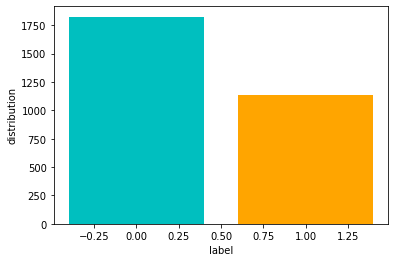

In [51]:
one = 0
zero = 0

for i in y_train:
    if i == 1:
        one+=1
    else:
        zero+=1
        
x = [1,0]
y = [one,zero]

plt.bar(x,y,color=['orange', 'c'])
plt.xlabel('label')
plt.ylabel('distribution')

# Algorithm applied


## 1)Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regressor = LinearRegression()
model = regressor.fit(x_train,y_train)
y_pred = model.predict(x_test)
linear = r2_score(y_test,y_pred)

## 2) SVM

In [53]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model = clf.fit(x_train, y_train)
y_pred = model.predict(x_test)
svm = r2_score(y_test,y_pred)

svm



0.47098800918854544

# Model Evaluation

              precision    recall  f1-score   support

       Happy       0.61      0.68      0.64      1825
         Sad       0.38      0.32      0.35      1139

    accuracy                           0.54      2964
   macro avg       0.50      0.50      0.50      2964
weighted avg       0.53      0.54      0.53      2964

Specificity =  0.6772602739726027
Accuracy =  0.5401484480431848


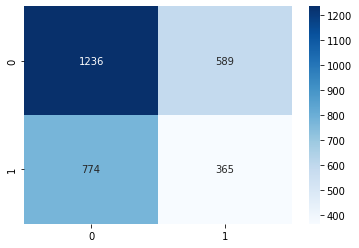

In [54]:
target_names = ['Happy', 'Sad']
model_eval = classification_report(y_train, y_pred ,target_names=target_names)
print(model_eval)
cf = confusion_matrix(y_train, y_pred)
Accuracy = accuracy_score(y_train, y_pred)
sns.heatmap(cf,cmap='Blues',annot=True,fmt='g')
cf_flat = cf.flatten()
TN = cf_flat[0]
FP = cf_flat[1]
FN = cf_flat[2]
TP = cf_flat[3]
recall = TP/(TP+FN)
precision =TP/(TP+FP)

specificity = TN/(TN+FP)
print('Specificity = ',specificity)
print('Accuracy = ',Accuracy)



# ROC curve

In [55]:
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve, auc
import plotly.express as px
fpr, tpr, thresholds = roc_curve(y_train,y_pred)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

# PR curve

In [56]:
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
from sklearn.datasets import make_classification


precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()


# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train,y_train)
y_pred = clf.predict(x_test)
logistic = r2_score(y_test,y_pred)
# plt.bar(y_test,y_pred,color=['red', 'blue'])
logistic

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.04606732654214807

# Model Evaluation

              precision    recall  f1-score   support

       Happy       0.62      0.68      0.65      1825
         Sad       0.40      0.33      0.36      1139

    accuracy                           0.55      2964
   macro avg       0.51      0.51      0.51      2964
weighted avg       0.53      0.55      0.54      2964

Specificity =  0.684931506849315
Accuracy =  0.5489203778677463


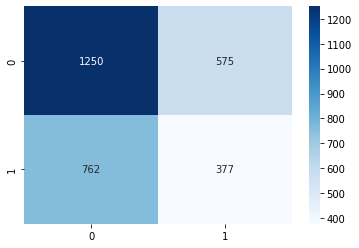

In [58]:
target_names = ['Happy', 'Sad']
model_eval = classification_report(y_train, y_pred ,target_names=target_names)
print(model_eval)
cf = confusion_matrix(y_train, y_pred)
Accuracy = accuracy_score(y_train, y_pred)
sns.heatmap(cf,cmap='Blues',annot=True,fmt='g')
cf_flat = cf.flatten()
TN = cf_flat[0]
FP = cf_flat[1]
FN = cf_flat[2]
TP = cf_flat[3]
recall = TP/(TP+FN)
precision =TP/(TP+FP)

specificity = TN/(TN+FP)
print('Specificity = ',specificity)
print('Accuracy = ',Accuracy)

from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve, auc
import plotly.express as px
fpr, tpr, thresholds = roc_curve(y_train,y_pred)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
from sklearn.datasets import make_classification


precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()


## 4) Decision tree


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
DecisionTreemodel = DecisionTreeClassifier()
model = DecisionTreemodel.fit(x_train,y_train)
cross_val_score(DecisionTreemodel,x_train,y_train,cv=10)
y_pred = model.predict(x_test)
decisiontree = model.score(x_test,y_test)
# plt.bar(y_test,y_pred,color=['red', 'blue'])
decisiontree

1.0

# Model Evaluation


              precision    recall  f1-score   support

       Happy       0.62      0.62      0.62      1825
         Sad       0.39      0.39      0.39      1139

    accuracy                           0.53      2964
   macro avg       0.51      0.51      0.51      2964
weighted avg       0.53      0.53      0.53      2964

Specificity =  0.6213698630136987
Accuracy =  0.5337381916329285


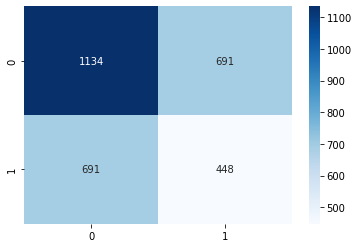

In [60]:
target_names = ['Happy', 'Sad']
model_eval = classification_report(y_train, y_pred ,target_names=target_names)
print(model_eval)
cf = confusion_matrix(y_train, y_pred)
Accuracy = accuracy_score(y_train, y_pred)
sns.heatmap(cf,cmap='Blues',annot=True,fmt='g')
cf_flat = cf.flatten()
TN = cf_flat[0]
FP = cf_flat[1]
FN = cf_flat[2]
TP = cf_flat[3]
recall = TP/(TP+FN)
precision =TP/(TP+FP)

specificity = TN/(TN+FP)
print('Specificity = ',specificity)
print('Accuracy = ',Accuracy)

from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve, auc
import plotly.express as px
fpr, tpr, thresholds = roc_curve(y_train,y_pred)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
from sklearn.datasets import make_classification


precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()


## 5) Random Forest


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

x,y = make_classification(n_samples = 2000,
                          random_state=0, shuffle=False)
randomforestmodel = RandomForestClassifier(max_depth=50)
randomforestmodel.fit(x_train,y_train)
y_pred = randomforestmodel.predict(x_test)
random = randomforestmodel.score(x_test,y_test)
random

1.0

# Model Evaluation


              precision    recall  f1-score   support

       Happy       0.62      0.89      0.73      1825
         Sad       0.38      0.11      0.17      1139

    accuracy                           0.59      2964
   macro avg       0.50      0.50      0.45      2964
weighted avg       0.53      0.59      0.51      2964

Specificity =  0.8882191780821918
Accuracy =  0.5894062078272605


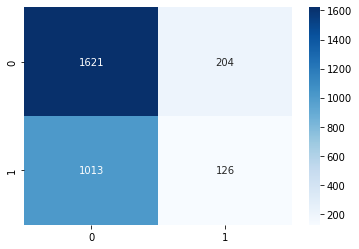

In [62]:
target_names = ['Happy', 'Sad']
model_eval = classification_report(y_train, y_pred ,target_names=target_names)
print(model_eval)
cf = confusion_matrix(y_train, y_pred)
Accuracy = accuracy_score(y_train, y_pred)
sns.heatmap(cf,cmap='Blues',annot=True,fmt='g')
cf_flat = cf.flatten()
TN = cf_flat[0]
FP = cf_flat[1]
FN = cf_flat[2]
TP = cf_flat[3]
recall = TP/(TP+FN)
precision =TP/(TP+FP)

specificity = TN/(TN+FP)
print('Specificity = ',specificity)
print('Accuracy = ',Accuracy)

from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve, auc
import plotly.express as px
fpr, tpr, thresholds = roc_curve(y_train,y_pred)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
from sklearn.datasets import make_classification


precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()


## 6) lasso 

In [63]:
from sklearn.linear_model import Lasso

lassomodel = Lasso(alpha=1)
regressor = lassomodel.fit(x_train,y_train)

In [64]:
y_pred = regressor.predict(x_test)
lasso = r2_score(y_test,y_pred)
print(lasso)

0.0


### 7) Ridge

In [65]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 1.0)
ridge_model.fit(x_train,y_train)
y_pred = ridge_model.predict(x_test)
ridge = ridge_model.score(x_test, y_test)

# Naive Bayes

In [66]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
naive = classifier.score(x_train,y_train)
# sns.heatmap(x_train.corr(),annot=True)

# Model Evaluation


              precision    recall  f1-score   support

       Happy       0.61      0.63      0.62      1825
         Sad       0.38      0.36      0.37      1139

    accuracy                           0.53      2964
   macro avg       0.50      0.50      0.50      2964
weighted avg       0.52      0.53      0.52      2964

Specificity =  0.6312328767123287
Accuracy =  0.5269905533063428


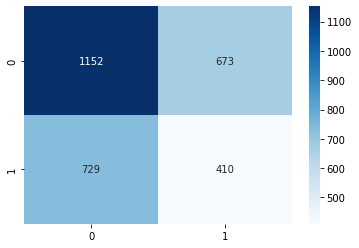

In [67]:
target_names = ['Happy', 'Sad']
model_eval = classification_report(y_train, y_pred ,target_names=target_names)
print(model_eval)
cf = confusion_matrix(y_train, y_pred)
Accuracy = accuracy_score(y_train, y_pred)
sns.heatmap(cf,cmap='Blues',annot=True,fmt='g')
cf_flat = cf.flatten()
TN = cf_flat[0]
FP = cf_flat[1]
FN = cf_flat[2]
TP = cf_flat[3]
recall = TP/(TP+FN)
precision =TP/(TP+FP)

specificity = TN/(TN+FP)
print('Specificity = ',specificity)
print('Accuracy = ',Accuracy)

from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve, auc
import plotly.express as px
fpr, tpr, thresholds = roc_curve(y_train,y_pred)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
from sklearn.datasets import make_classification


precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()


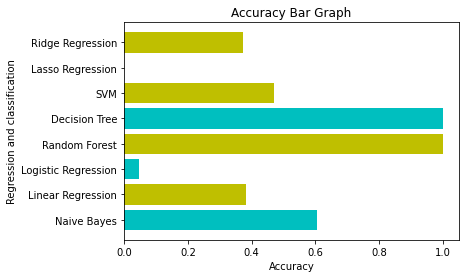

In [70]:
x = ['Naive Bayes','Linear Regression','Logistic Regression','Random Forest','Decision Tree','SVM','Lasso Regression','Ridge Regression']
y = [naive,linear,logistic,random,decisiontree,svm,lasso,ridge]
plt.barh(x,y,color=['c','y'])
plt.xlabel('Accuracy')
plt.ylabel('Regression and classification')
plt.title('Accuracy Bar Graph')
plt.show()